#PROYECTO SOBRE TENDENCIAS EN ACCIDENTES CEREBROVASCULARES


Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report



Carga del dataset "Medical Cost Insurance Personal"



In [2]:
dt = pd.read_csv("/content/healthcare-dataset-stroke-data.csv", sep=",")
dt.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Analisis exploratorio de los datos

Eliminacion de la columna Id, dado que no tiene utilidad para efectos del modelo

In [20]:
dt.drop("id", axis=1, inplace=True)

Ver caracteristicas de las columnas restantes

In [4]:
dt.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Se aprecian valores faltantes dentro de las observaciones del BMI

In [6]:
dt.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Rellenar valores faltantes con promedio de bmi, caso en el que la segunda observacion que inicialmente mostraba NaN ahora tendra el valor de 28,89

In [7]:
dt.fillna(dt.bmi.mean(), inplace=True)
dt.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Buscar duplicados

In [8]:
duplicate = dt[dt.duplicated()]

duplicate

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Encontrar valores atipicos

<Axes: xlabel='age'>

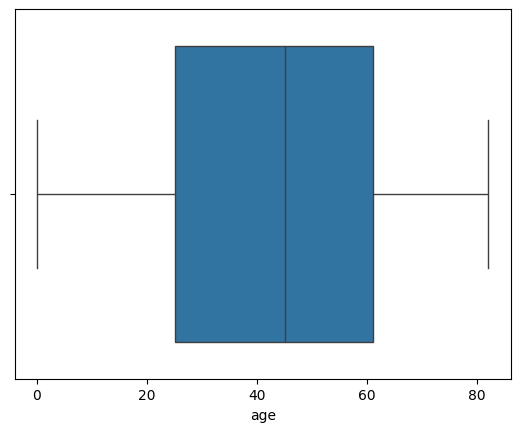

In [9]:
sb.boxplot(x=dt['age'])

<Axes: xlabel='bmi'>

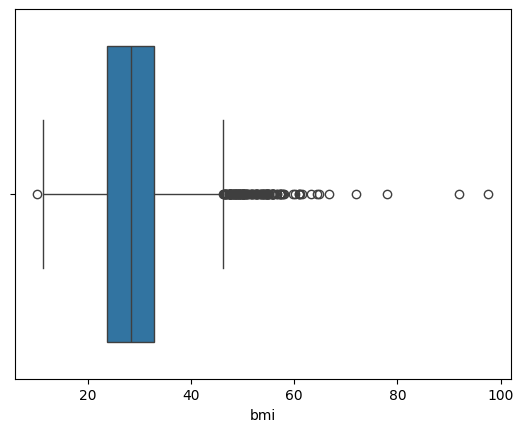

In [10]:
sb.boxplot(x=dt['bmi'])

<Axes: xlabel='avg_glucose_level'>

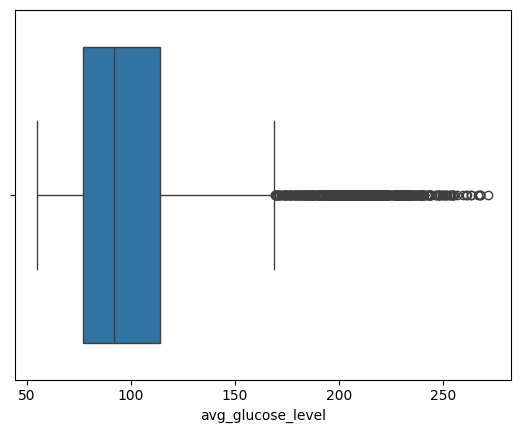

In [11]:
sb.boxplot(x=dt['avg_glucose_level'])

<ipython-input-21-099df6c16ae0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= dt.corr()


<Axes: >

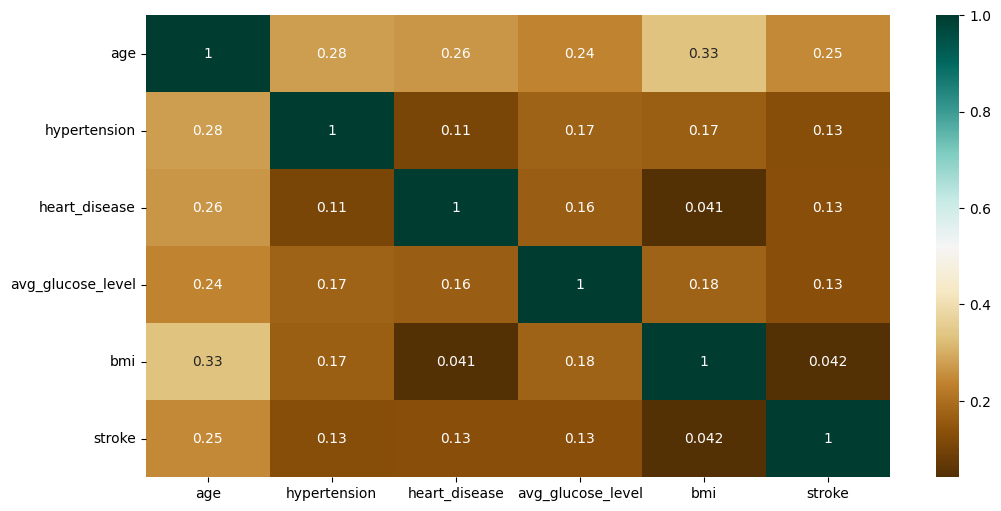

In [21]:
plt.figure(figsize=(12,6))
c= dt.corr()
sb.heatmap(c,cmap="BrBG",annot=True)

### Visualizacion grafica de tendencias

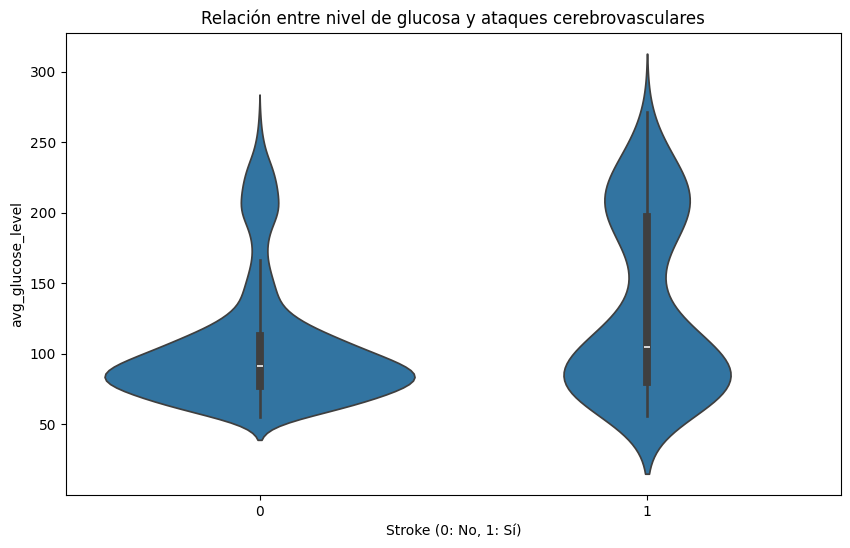

In [5]:

stroke_data = dt[dt['stroke'] == 1]
no_stroke_data = dt[dt['stroke'] == 0]


plt.figure(figsize=(10, 6))
sb.violinplot(x='stroke', y='avg_glucose_level', data=dt)
plt.title('Relación entre nivel de glucosa y ataques cerebrovasculares')
plt.xlabel('Stroke (0: No, 1: Sí)')
plt.ylabel('avg_glucose_level')
plt.show()

Text(0.0, 1.0, 'Cantidad de accidentes segun genero')

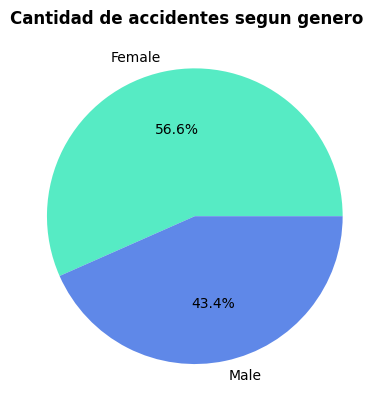

In [8]:
gender_filter=stroke_data['gender'].value_counts()

plt.pie(gender_filter, labels=gender_filter.index, autopct='%1.1f%%',colors=["#56EBC4", "#5F88E8"])
plt.title("Cantidad de accidentes segun genero",
               loc="left", fontdict={"fontsize": 12, "fontweight": "bold", "color": "black"})

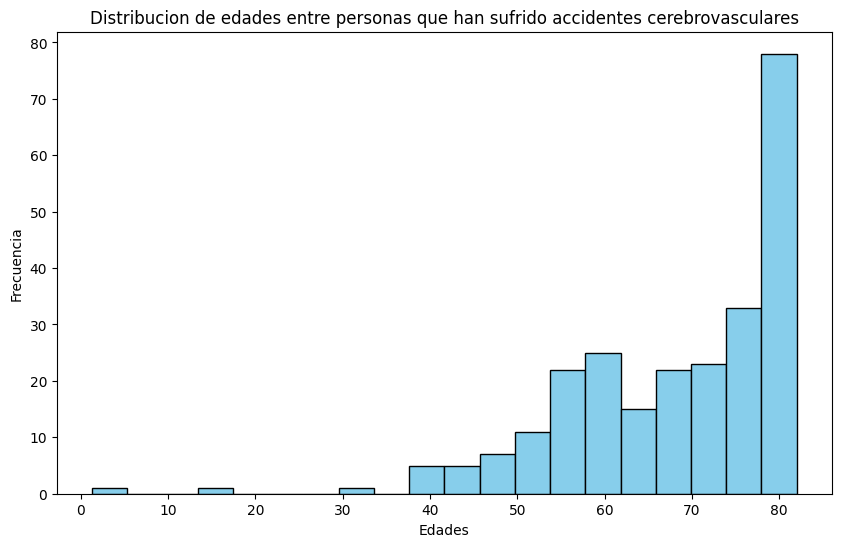

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(stroke_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Distribucion de edades entre personas que han sufrido accidentes cerebrovasculares')
plt.show()

### Transformacion de variables categoricas

Se transforman las variables categoricas en numericas para efectos de la aplicacion del modelo

In [12]:

label_encoder = LabelEncoder()
dt['gender'] = label_encoder.fit_transform(dt['gender'])
dt['ever_married'] = label_encoder.fit_transform(dt['ever_married'])
dt['work_type'] = label_encoder.fit_transform(dt['work_type'])
dt['Residence_type'] = label_encoder.fit_transform(dt['Residence_type'])
dt['smoking_status'] = label_encoder.fit_transform(dt['smoking_status'])


### Modelo de regresion logistica

In [16]:
X = dt.drop('stroke', axis=1)
y = dt['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coeficientes del modelo:")
print(model.coef_)
print("\nIntercept del modelo:")
print(model.intercept_)



Coeficientes del modelo:
[[-0.02051392  0.07082309  0.42382926  0.6057424  -0.6332869  -0.29369734
   0.24149504  0.00403588  0.00084934 -0.16808662]]

Intercept del modelo:
[-6.53197939]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluacion del modelo

Exactitud del modelo: 93.93%
AUC-ROC Score: 0.8461021505376345


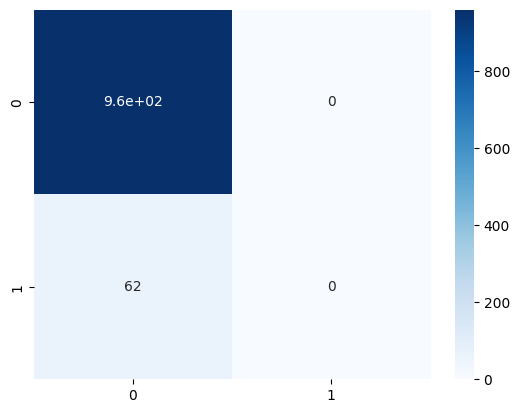

In [17]:
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sb.heatmap(cm, annot=True, cmap='Blues')

accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))

y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC Score: {roc_auc}')

### Curva ROC

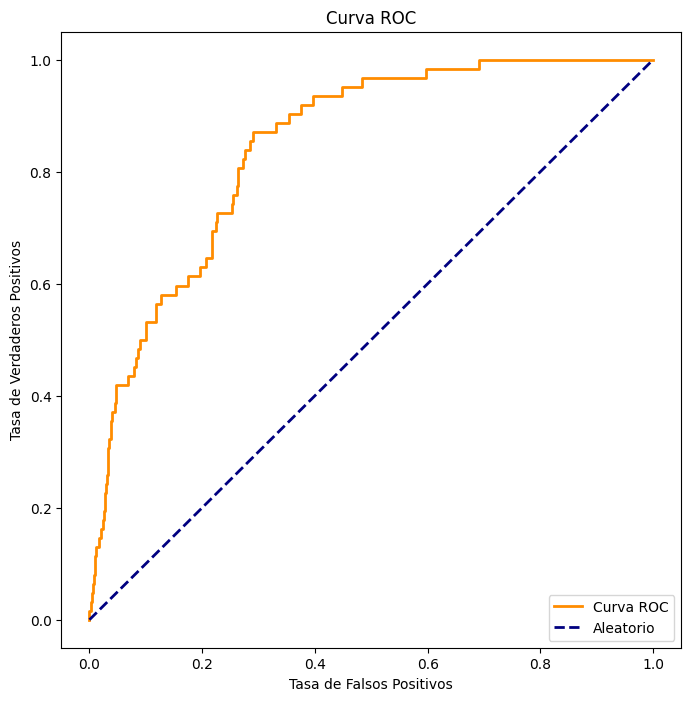

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()